<a href="https://colab.research.google.com/github/Ernesto16/AI-Saturdays/blob/master/Week6_Assessment/Linear_Regression_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

The dataset represents houses with 100 datapoints and several input features such as lot size, house area, build year, bathrooms, garden size, and more. Each datapoint also contains four possible output variables:

taxvalue

retailvalue

energy-eff

monument

For this task, we focus on a regression problem, where the goal is to predict retailvalue (house price) based on the available features.

To achieve this, the other output columns (taxvalue, energy-eff, and monument) are dropped, leaving only the input features as predictors and retailvalue as the target.

In [101]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chitomuzokwe","key":"067decdd68ea9148a8068a44c3dfc9f4"}'}

In [102]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                              title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                      Uber Data Analytics Dashboard                        17324552  2025-08-08 11:13:42.920000          42067        949  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets            Student Stress Monitoring Datasets                      24336  2025-07-24 16:30:01.617000          23353        395  1.0              
eshummalik/bmw-sales-dataset                                     BMW_Sales_Dataset                                      853348  2025-09-05 08:28:34.630000            984         27  1.0              


In [103]:
!kaggle datasets list -s Utrecht

ref                                                title                                       size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ictinstitute/utrecht-housing-dataset               Utrecht housing dataset                    72621  2025-01-27 10:59:56.087000           1453          9  1.0              
ictinstitute/utrecht-fairness-recruitment-dataset  Utrecht Fairness Recruitment dataset       47198  2025-03-11 10:48:35.083000           1297          6  1.0              
tamal2000/utrecht-geolocations                     Utrecht Geolocations                      232161  2019-11-13 08:47:57.227000             94          2  0.88235295       
menglugeo/utrechtroads                             utrechtroads                              100470  2020-06-23 12:50:21.500000        

In [104]:
!kaggle datasets download ictinstitute/utrecht-housing-dataset

Dataset URL: https://www.kaggle.com/datasets/ictinstitute/utrecht-housing-dataset
License(s): CC-BY-SA-4.0
utrecht-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [105]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utrecht-housing-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [106]:
import pandas as pd #import pandas libary

df = pd.read_csv('/content/utrechthousingsmall.csv') #read csv file
df.head(10) #view dataset

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument,select
0,150219,3528,10.7,5.2,55.6,93.60,5.2,0,2068,5055,1935,1,419000,568000,0,1,0
1,880377,3800,18.6,6.2,115.3,111.60,40.9,2,2861,5056,1927,1,539000,649000,0,1,0
2,110456,3528,12.7,5.2,66.0,117.00,5.2,0,2267,5118,1941,1,521000,716000,0,1,0
3,520728,3800,16.2,6.3,102.1,141.75,26.5,2,2615,5150,1940,1,649000,825000,0,1,0
4,881551,3800,17.6,8.1,142.6,182.25,69.7,2,2756,5359,1960,1,843000,1015000,0,1,0
5,801846,3528,12.2,8.0,97.6,144.00,8.0,0,2219,5450,1961,2,654000,845000,1,0,0
6,892303,3800,15.0,10.9,163.5,196.20,54.5,2,2504,5559,1981,1,916000,1130000,0,1,0
7,342684,3525,14.0,11.0,154.0,148.50,22.0,2,2401,5667,1986,1,717000,883000,0,0,0
8,112919,3500,15.6,6.5,101.4,146.25,29.9,1,2558,5719,1991,1,666000,772000,0,0,0
9,263115,3500,15.6,10.3,160.7,185.40,68.0,2,2558,5762,1989,2,870000,1006000,1,0,0


In [107]:
len(df)

100

In [108]:
df = df.drop(columns=["taxvalue", "energy-eff", "monument", "select"])

In [109]:
df

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,retailvalue
0,150219,3528,10.7,5.2,55.6,93.60,5.2,0,2068,5055,1935,1,568000
1,880377,3800,18.6,6.2,115.3,111.60,40.9,2,2861,5056,1927,1,649000
2,110456,3528,12.7,5.2,66.0,117.00,5.2,0,2267,5118,1941,1,716000
3,520728,3800,16.2,6.3,102.1,141.75,26.5,2,2615,5150,1940,1,825000
4,881551,3800,17.6,8.1,142.6,182.25,69.7,2,2756,5359,1960,1,1015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,213683,3525,14.1,8.5,119.9,153.00,17.9,1,2413,5908,2004,1,792000
96,633809,3525,10.0,7.3,73.0,98.55,7.3,0,2000,5962,2007,1,497000
97,741215,3528,10.5,8.6,90.3,154.80,12.9,2,2051,5304,1958,1,908000
98,841248,3528,12.1,10.9,131.9,196.20,12.0,2,2212,5301,1956,1,1198000


In [110]:
# Since id is just an identifier
df = df.drop(columns=['id'])

In [111]:
df

,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,retailvalue
0,3528,10.7,5.2,55.6,93.60,5.2,0,2068,5055,1935,1,568000
1,3800,18.6,6.2,115.3,111.60,40.9,2,2861,5056,1927,1,649000
2,3528,12.7,5.2,66.0,117.00,5.2,0,2267,5118,1941,1,716000
3,3800,16.2,6.3,102.1,141.75,26.5,2,2615,5150,1940,1,825000
4,3800,17.6,8.1,142.6,182.25,69.7,2,2756,5359,1960,1,1015000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3525,14.1,8.5,119.9,153.00,17.9,1,2413,5908,2004,1,792000
96,3525,10.0,7.3,73.0,98.55,7.3,0,2000,5962,2007,1,497000
97,3528,10.5,8.6,90.3,154.80,12.9,2,2051,5304,1958,1,908000
98,3528,12.1,10.9,131.9,196.20,12.0,2,2212,5301,1956,1,1198000


In [112]:
df.shape, df.columns

((100, 12),
 Index(['zipcode', 'lot-len', 'lot-width', 'lot-area', 'house-area',
        'garden-size', 'balcony', 'x-coor', 'y-coor', 'buildyear', 'bathrooms',
        'retailvalue'],
       dtype='object'))

In [113]:
df.isnull().sum()

,0
zipcode,0
lot-len,0
lot-width,0
lot-area,0
house-area,0
garden-size,0
balcony,0
x-coor,0
y-coor,0
buildyear,0


In [114]:
df.dtypes

,0
zipcode,int64
lot-len,float64
lot-width,float64
lot-area,float64
house-area,float64
garden-size,float64
balcony,int64
x-coor,int64
y-coor,int64
buildyear,int64


In [115]:
df['zipcode'] = df['zipcode'].astype('object')

In [116]:
df.describe()

,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,retailvalue
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,1.000000e+02
mean,14.778000,7.644000,112.783000,138.240000,32.401000,1.200000,2477.470000,5483.90000,1969.460000,1.350000,7.823200e+05
std,2.750815,1.673098,31.858304,37.396767,20.603077,0.738549,274.854175,294.61454,26.554469,0.479372,1.874427e+05
min,10.000000,5.100000,54.500000,68.850000,5.200000,0.000000,2000.000000,5006.00000,1926.000000,1.000000,4.400000e+05
25%,12.500000,6.300000,89.650000,109.350000,12.600000,1.000000,2250.750000,5218.00000,1946.250000,1.000000,6.535000e+05
50%,15.000000,7.550000,109.400000,137.475000,30.100000,1.000000,2502.000000,5453.50000,1967.000000,1.000000,7.705000e+05
75%,17.025000,8.750000,132.125000,162.450000,48.800000,2.000000,2704.250000,5715.25000,1991.000000,2.000000,8.935000e+05
max,19.700000,11.000000,198.400000,245.250000,78.500000,2.000000,2969.000000,5968.00000,2017.000000,2.000000,1.339000e+06


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zipcode      100 non-null    object 
 1   lot-len      100 non-null    float64
 2   lot-width    100 non-null    float64
 3   lot-area     100 non-null    float64
 4   house-area   100 non-null    float64
 5   garden-size  100 non-null    float64
 6   balcony      100 non-null    int64  
 7   x-coor       100 non-null    int64  
 8   y-coor       100 non-null    int64  
 9   buildyear    100 non-null    int64  
 10  bathrooms    100 non-null    int64  
 11  retailvalue  100 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 9.5+ KB


In [118]:
df

,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,retailvalue
0,3528,10.7,5.2,55.6,93.60,5.2,0,2068,5055,1935,1,568000
1,3800,18.6,6.2,115.3,111.60,40.9,2,2861,5056,1927,1,649000
2,3528,12.7,5.2,66.0,117.00,5.2,0,2267,5118,1941,1,716000
3,3800,16.2,6.3,102.1,141.75,26.5,2,2615,5150,1940,1,825000
4,3800,17.6,8.1,142.6,182.25,69.7,2,2756,5359,1960,1,1015000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3525,14.1,8.5,119.9,153.00,17.9,1,2413,5908,2004,1,792000
96,3525,10.0,7.3,73.0,98.55,7.3,0,2000,5962,2007,1,497000
97,3528,10.5,8.6,90.3,154.80,12.9,2,2051,5304,1958,1,908000
98,3528,12.1,10.9,131.9,196.20,12.0,2,2212,5301,1956,1,1198000


In [119]:
df["zipcode"] = df["zipcode"].astype(str)

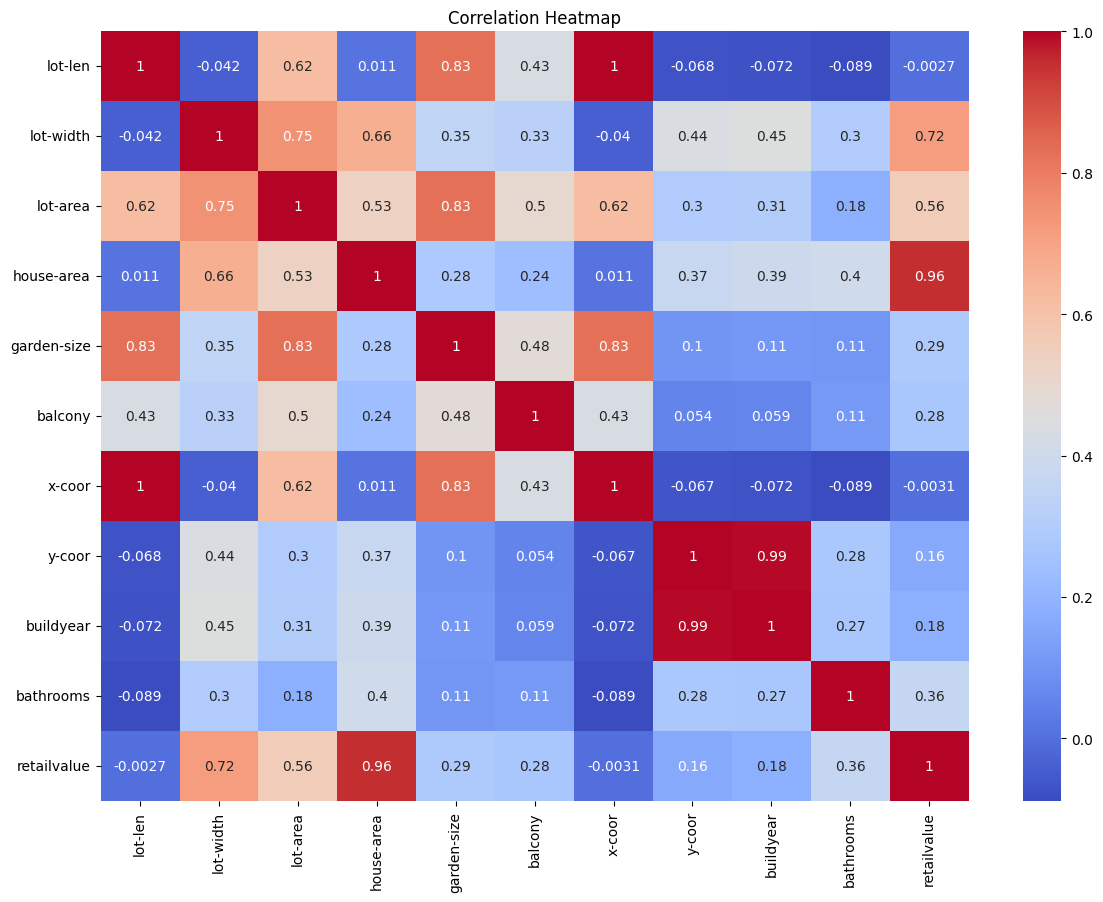

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

From the correlation heatmap, we can see that several features are highly correlated with each other, indicating potential **multicollinearity**. For example, lot-len, lot-width, and lot-area are strongly correlated, as are buildyear and the coordinate features (x-coor, y-coor). This suggests some predictors carry redundant information, which may affect the stability of coefficients in a linear regression model.

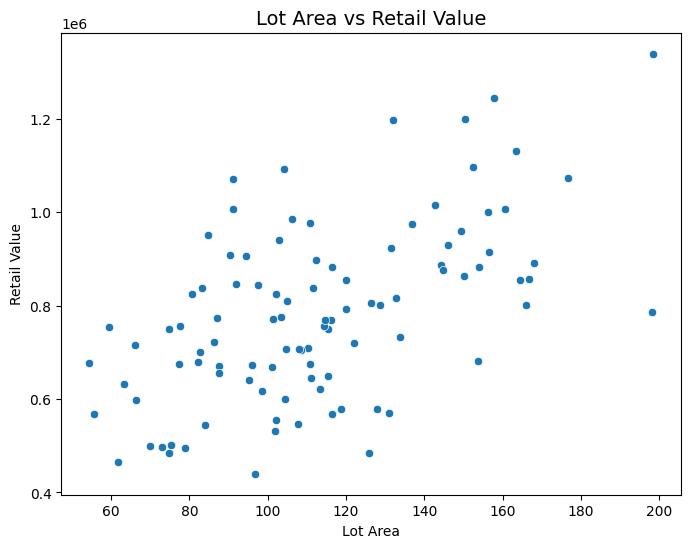

In [121]:
# We expect a positive correlation between the lot area and retail value based on the above heatmap
plt.figure(figsize=(8,6))
sns.scatterplot(x="lot-area", y="retailvalue", data=df)
plt.title("Lot Area vs Retail Value", fontsize=14)
plt.xlabel("Lot Area")
plt.ylabel("Retail Value")
plt.show()

# Computing VIF to further get more insights from the previous observation

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=["retailvalue"])  # predictors only
X = add_constant(X.select_dtypes(include=["float64", "int64"]))  # numeric only

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature            VIF
0         const  332931.176982
1       lot-len   11196.394161
2     lot-width      39.773291
3      lot-area      66.052076
4    house-area       2.104547
5   garden-size       7.361515
6       balcony       1.640190
7        x-coor   11096.266775
8        y-coor      64.467716
9     buildyear      65.529383
10    bathrooms       1.316903


In [123]:
df.drop(columns=["lot-len", "lot-width", "x-coor", "y-coor"], inplace=True)

In [124]:
df.columns

Index(['zipcode', 'lot-area', 'house-area', 'garden-size', 'balcony',
       'buildyear', 'bathrooms', 'retailvalue'],
      dtype='object')

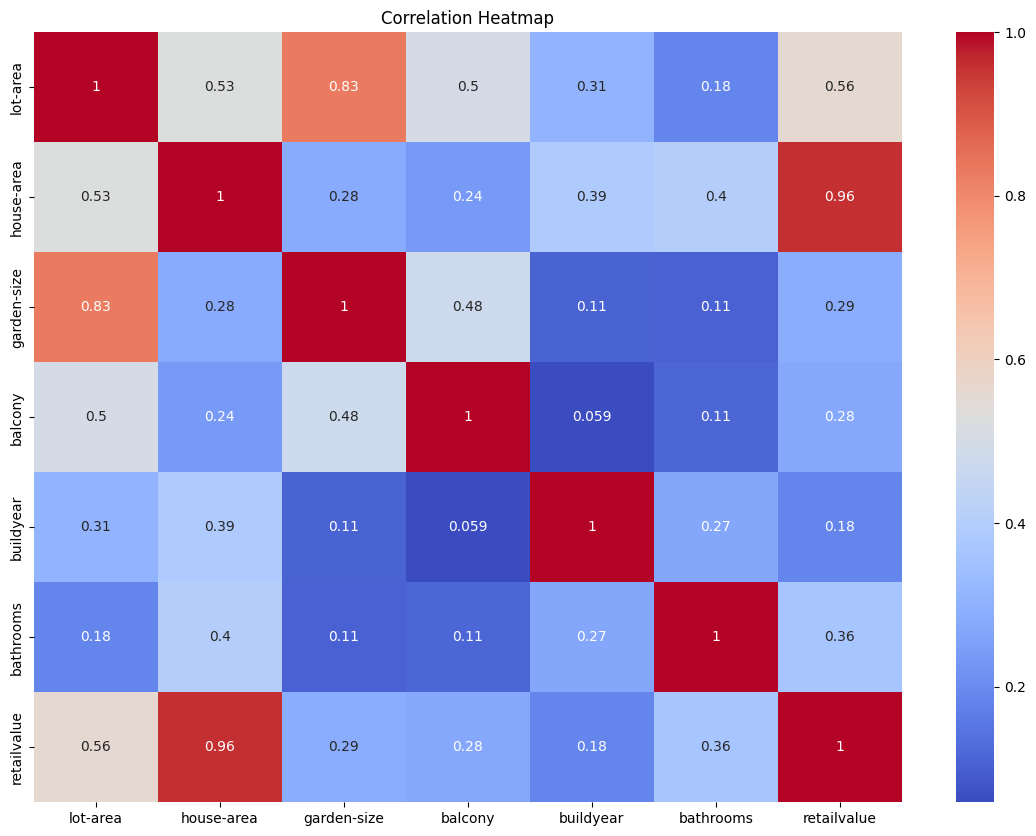

In [125]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [126]:
df

,zipcode,lot-area,house-area,garden-size,balcony,buildyear,bathrooms,retailvalue
0,3528,55.6,93.60,5.2,0,1935,1,568000
1,3800,115.3,111.60,40.9,2,1927,1,649000
2,3528,66.0,117.00,5.2,0,1941,1,716000
3,3800,102.1,141.75,26.5,2,1940,1,825000
4,3800,142.6,182.25,69.7,2,1960,1,1015000
...,...,...,...,...,...,...,...,...
95,3525,119.9,153.00,17.9,1,2004,1,792000
96,3525,73.0,98.55,7.3,0,2007,1,497000
97,3528,90.3,154.80,12.9,2,1958,1,908000
98,3528,131.9,196.20,12.0,2,1956,1,1198000


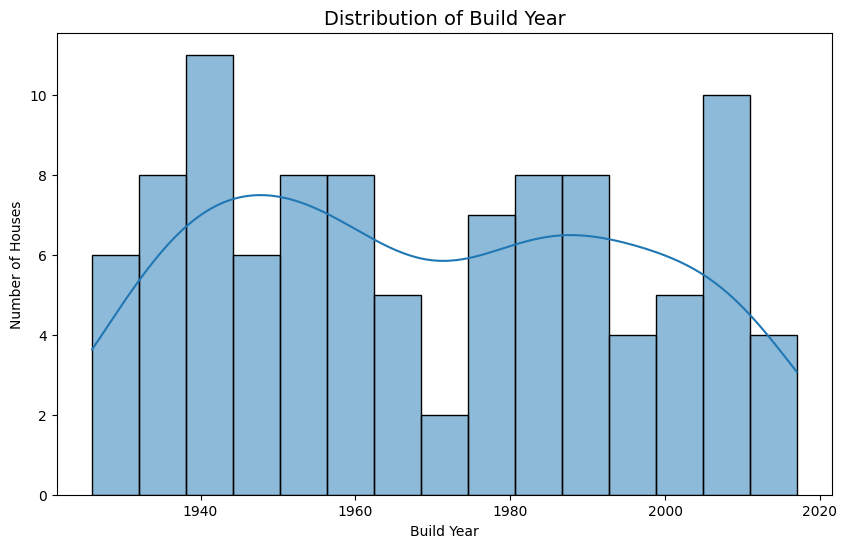

In [127]:
plt.figure(figsize=(10,6))
sns.histplot(df["buildyear"], bins=15, kde=True)
plt.title("Distribution of Build Year", fontsize=14)
plt.xlabel("Build Year")
plt.ylabel("Number of Houses")
plt.show()

In [128]:
# Check skewness
skewness = df["buildyear"].skew()
print(f"Skewness of buildyear: {skewness:.2f}")

Skewness of buildyear: 0.10


In [129]:
# Still noticing a strong postive correlation of 0.83 between the lot-area and garden-size
df.drop(columns=["garden-size"], inplace=True)

In [130]:
df

,zipcode,lot-area,house-area,balcony,buildyear,bathrooms,retailvalue
0,3528,55.6,93.60,0,1935,1,568000
1,3800,115.3,111.60,2,1927,1,649000
2,3528,66.0,117.00,0,1941,1,716000
3,3800,102.1,141.75,2,1940,1,825000
4,3800,142.6,182.25,2,1960,1,1015000
...,...,...,...,...,...,...,...
95,3525,119.9,153.00,1,2004,1,792000
96,3525,73.0,98.55,0,2007,1,497000
97,3528,90.3,154.80,2,1958,1,908000
98,3528,131.9,196.20,2,1956,1,1198000


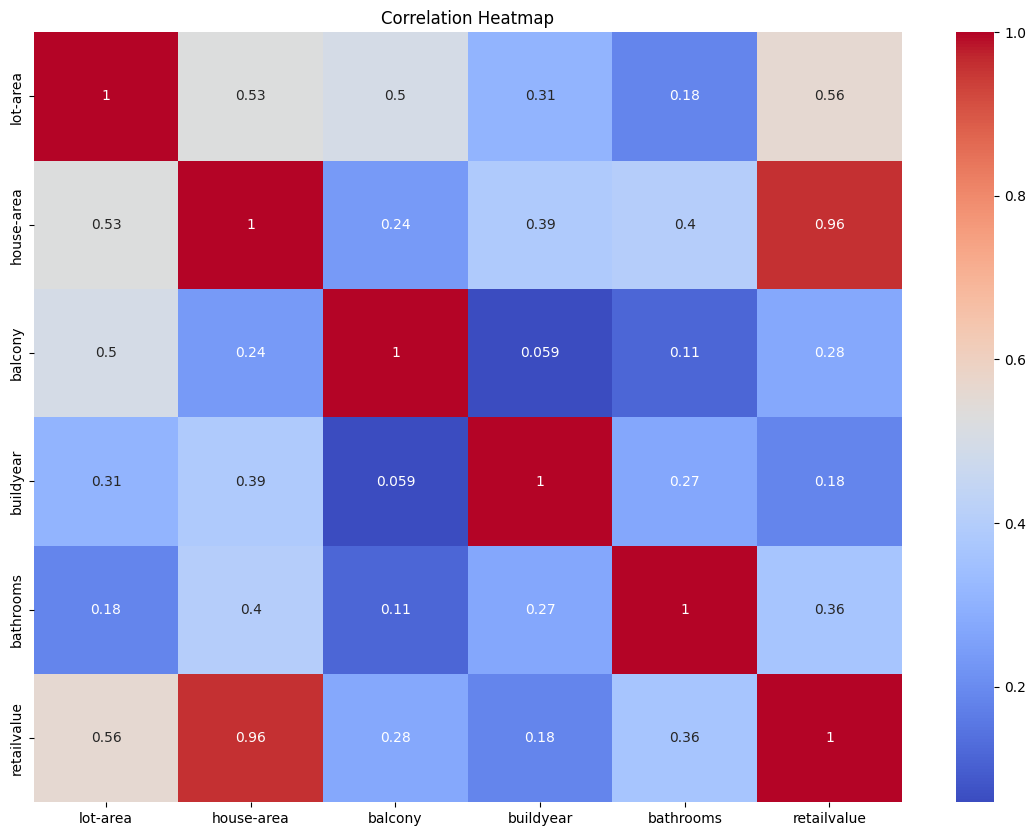

In [131]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

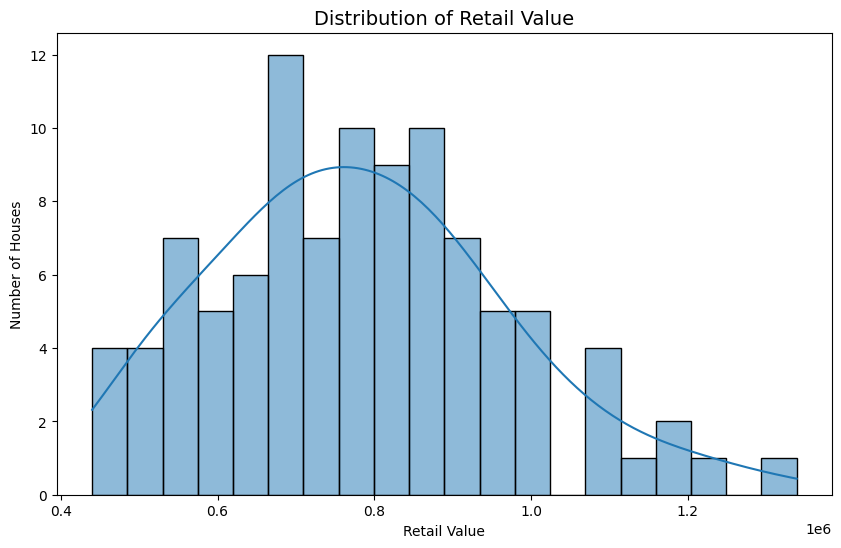

Skewness of retailvalue: 0.48


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of retailvalue
plt.figure(figsize=(10,6))
sns.histplot(df["retailvalue"], bins=20, kde=True)
plt.title("Distribution of Retail Value", fontsize=14)
plt.xlabel("Retail Value")
plt.ylabel("Number of Houses")
plt.show()

# Check skewness
skewness = df["retailvalue"].skew()
print(f"Skewness of retailvalue: {skewness:.2f}")

In [133]:
df_enc = pd.get_dummies(df, columns=["zipcode"], drop_first=True)

In [140]:
df_enc.head()

,lot-area,house-area,balcony,buildyear,bathrooms,retailvalue,zipcode_3525,zipcode_3528,zipcode_3800
0,55.6,93.60,0,1935,1,568000,False,True,False
1,115.3,111.60,2,1927,1,649000,False,False,True
2,66.0,117.00,0,1941,1,716000,False,True,False
3,102.1,141.75,2,1940,1,825000,False,False,True
4,142.6,182.25,2,1960,1,1015000,False,False,True


In [141]:
df.head()

,zipcode,lot-area,house-area,balcony,buildyear,bathrooms,retailvalue
0,3528,55.6,93.60,0,1935,1,568000
1,3800,115.3,111.60,2,1927,1,649000
2,3528,66.0,117.00,0,1941,1,716000
3,3800,102.1,141.75,2,1940,1,825000
4,3800,142.6,182.25,2,1960,1,1015000


In [137]:
df['zipcode'].unique()

array(['3528', '3800', '3525', '3500'], dtype=object)

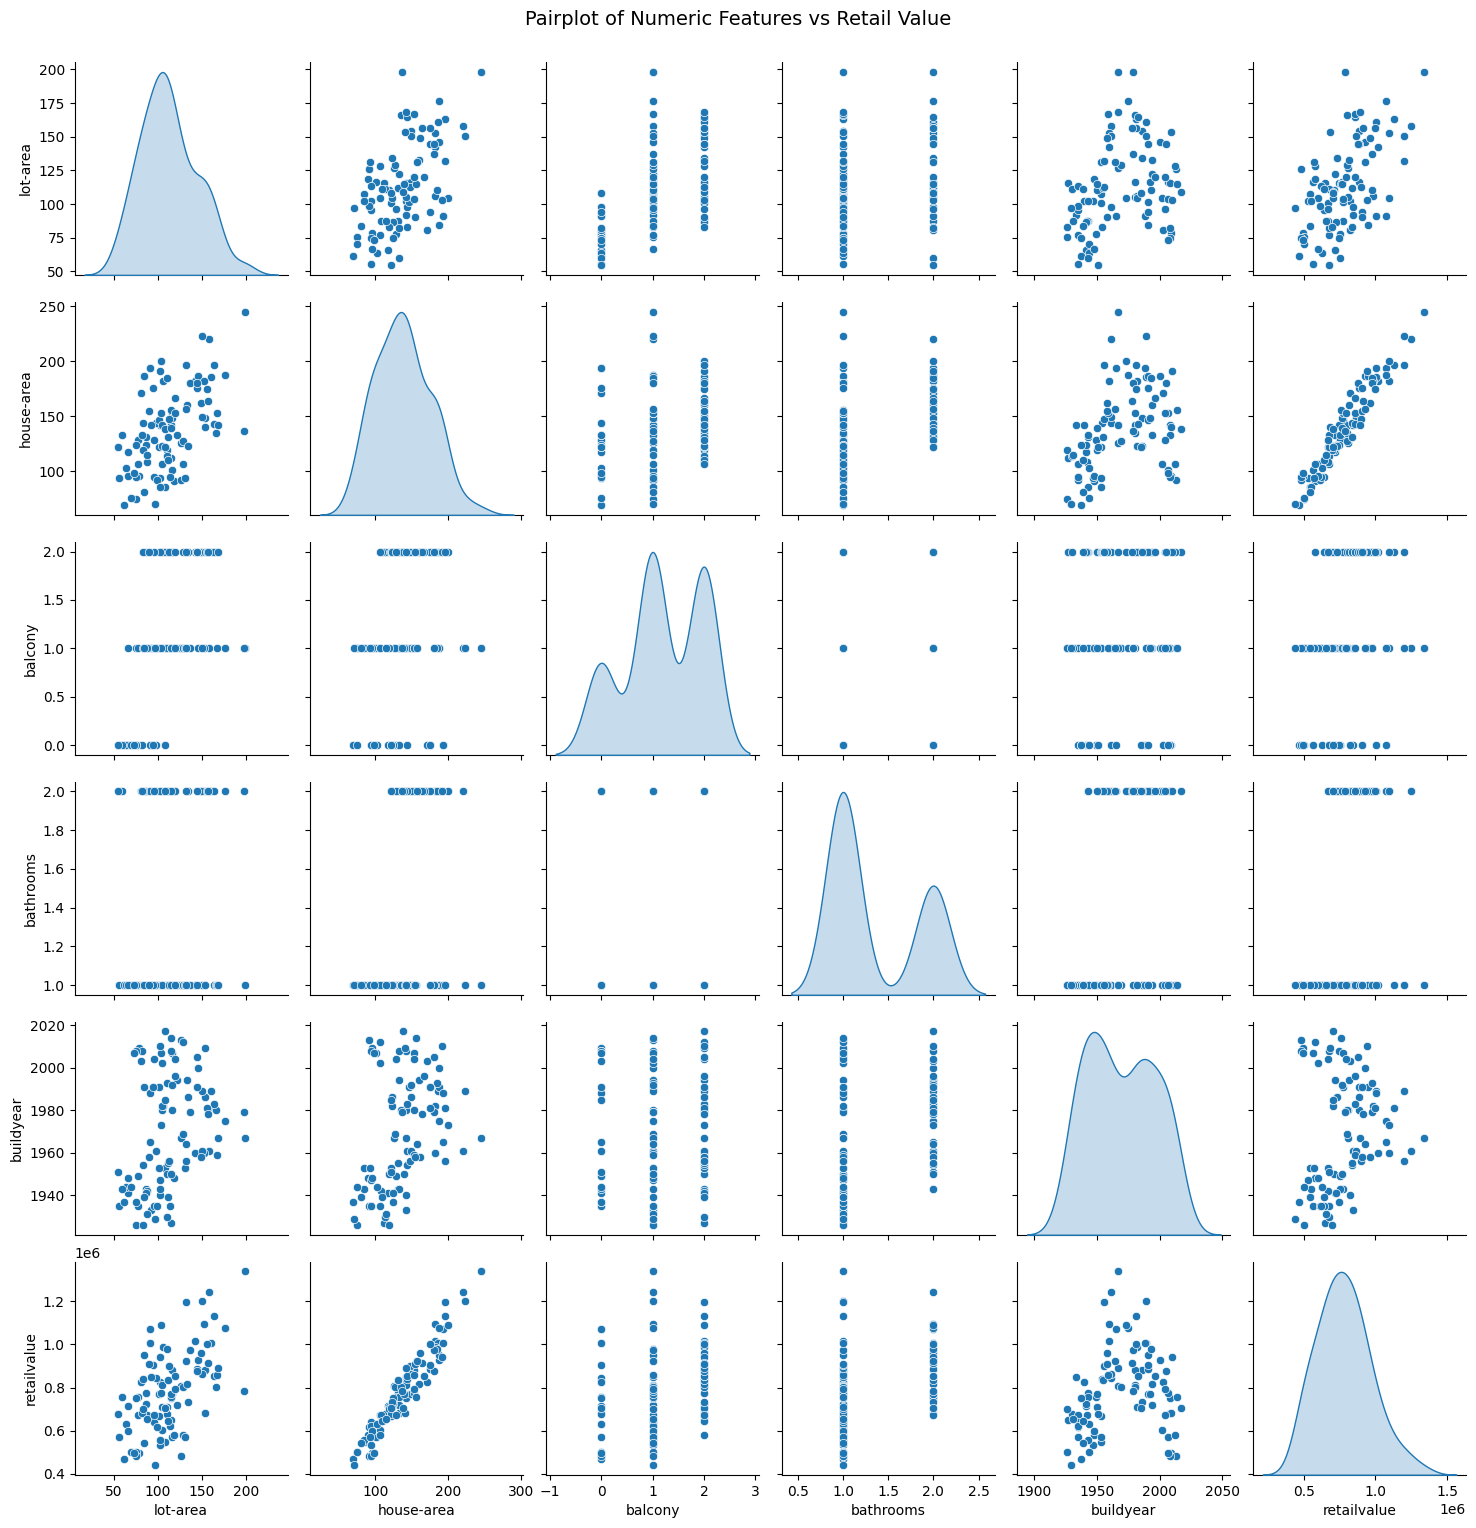

In [152]:
# Select only the numeric columns for pairplot
numeric_cols = ["lot-area", "house-area", "balcony", "bathrooms", "buildyear", "retailvalue"]

# Plot pairplot
sns.pairplot(df_enc[numeric_cols], kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features vs Retail Value", y=1.02, fontsize=14)
plt.show()

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [147]:
# Splitting our dataset into X and y
X = df_enc.drop("retailvalue", axis=1)
y = df_enc["retailvalue"]

In [148]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [150]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1229356729.95


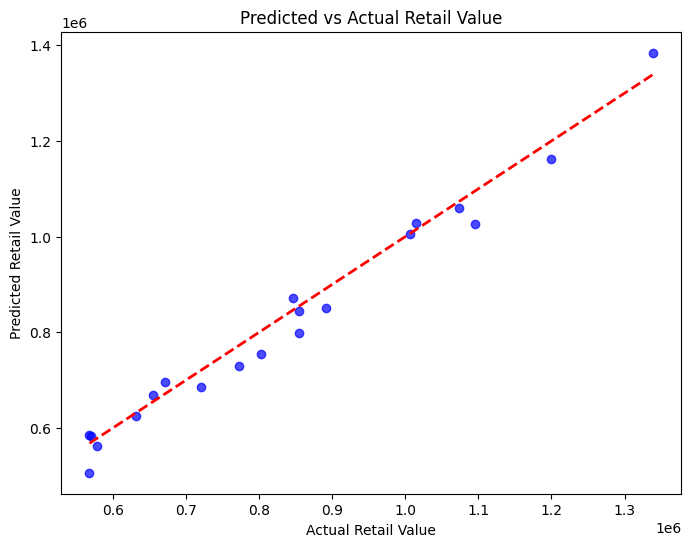

In [153]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Retail Value")
plt.ylabel("Predicted Retail Value")
plt.title("Predicted vs Actual Retail Value")
plt.show()

In [156]:
import numpy as np

# Percentage error for each prediction
percentage_error = np.abs((y_test - y_pred) / y_test) * 100

# Average prediction accuracy
avg_prediction_accuracy = 100 - percentage_error.mean()
print(f"Average Prediction Accuracy: {avg_prediction_accuracy:.2f}%")

Average Prediction Accuracy: 96.39%
